In [112]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [113]:
# Some basic parameters
inpDir = 'D:\DNN\input' # location where input data is stored
outDir = '../output' # location to store outputs
subDir = 'fashion_MNIST' # location of the images
modelDir = '../models'
altName = '?????'

RANDOM_STATE = 24 # for initialization ----- REMEMBER: to remove at the time of promotion to production


EPOCHS = 10 # number of cycles to run
ALPHA = 0.1 # learning rate

# Set parameters for decoration of plots
params = {'legend.fontsize' : 'large',
          'figure.figsize'  : (9,9),
          'axes.labelsize'  : 'x-large',
          'axes.titlesize'  :'x-large',
          'xtick.labelsize' :'large',
          'ytick.labelsize' :'large',
         }

plt.rcParams.update(params) # update rcParams
CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

In [114]:

data = pd.read_csv(os.path.join(inpDir,'breast_cancer_mod.csv'))

In [115]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,1,1,0
1,0,1,0,0,0,0,0,0,0,1,...,1,0,1,0,1,1,0,1,1,0
2,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
4,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0


<Axes: xlabel='target'>

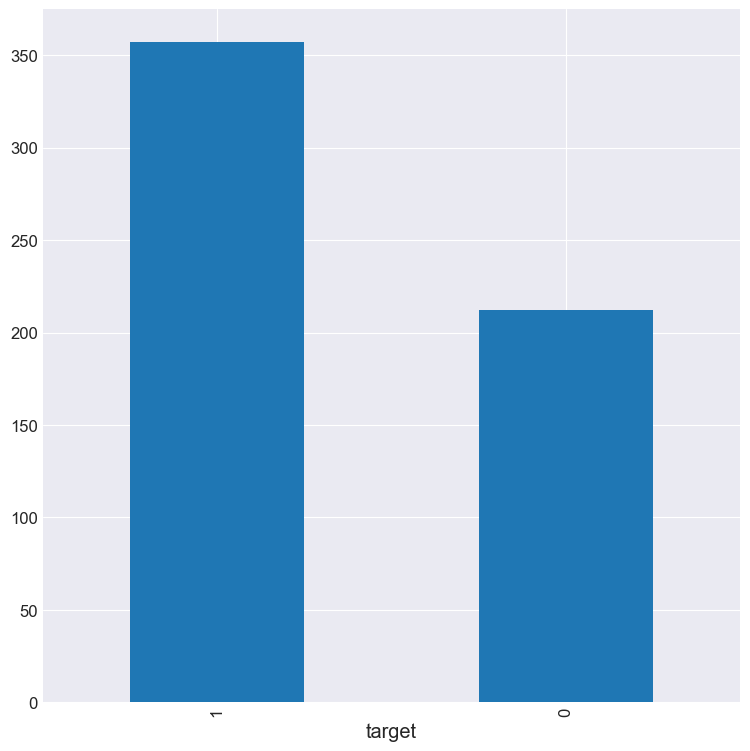

In [116]:
fig,ax = plt.subplots()
data['target'].value_counts().plot(ax=ax,kind='bar')

In [117]:
from sklearn.model_selection import train_test_split
feature = data.drop(['target'],axis=1)
labels = data['target']

X_train,X_test,y_train,y _test = train_test_split(feature,labels,test_size=0.2,stratify=labels,random_state=RANDOM_STATE)

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (1459902692.py, line 5)

In [ ]:
X_train


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,total,target,pred
0,0,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,1,1,12,0,False
2,0,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,13,0,False
1,0,1,0,0,0,0,0,0,0,1,...,1,0,1,1,0,1,1,13,0,False
7,0,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,15,0,False
6,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,1,1,15,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,30,1,True
491,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,30,1,True
557,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,30,1,True
551,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,30,1,True


In [118]:
X_test

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,total,target,pred
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,1,14,0,False
4,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,1,14,0,False
12,0,1,0,0,0,1,0,0,1,1,...,0,1,1,1,0,1,1,16,0,False
18,0,0,0,1,1,0,0,0,0,1,...,1,0,1,1,0,1,1,18,0,False
35,1,1,1,1,0,0,0,0,0,0,...,1,0,1,1,0,1,1,20,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,30,1,True
340,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,30,1,True
565,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,30,1,True
457,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,30,1,True


In [ ]:
X_train['total'] = X_train.astype(np.int16).sum(axis=1)

X_train['target'] = y_train

X_train.sort_values('total',inplace=True)

X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,total,target
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,1,1,12,0
2,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,13,0
1,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1,1,0,1,1,13,0
7,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,15,0
6,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,1,15,0


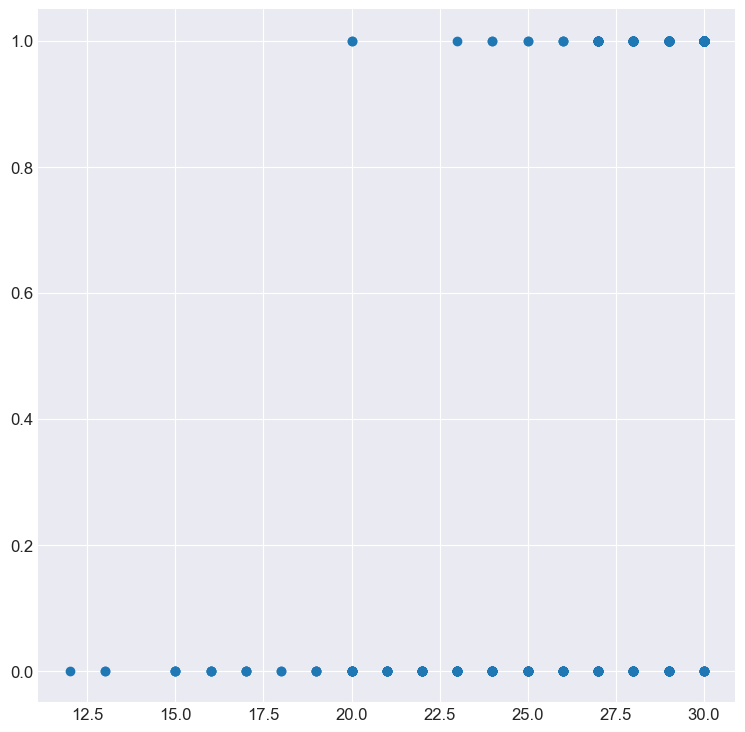

In [80]:
plt.scatter(X_train['total'],X_train['target'])

<Axes: xlabel='total'>

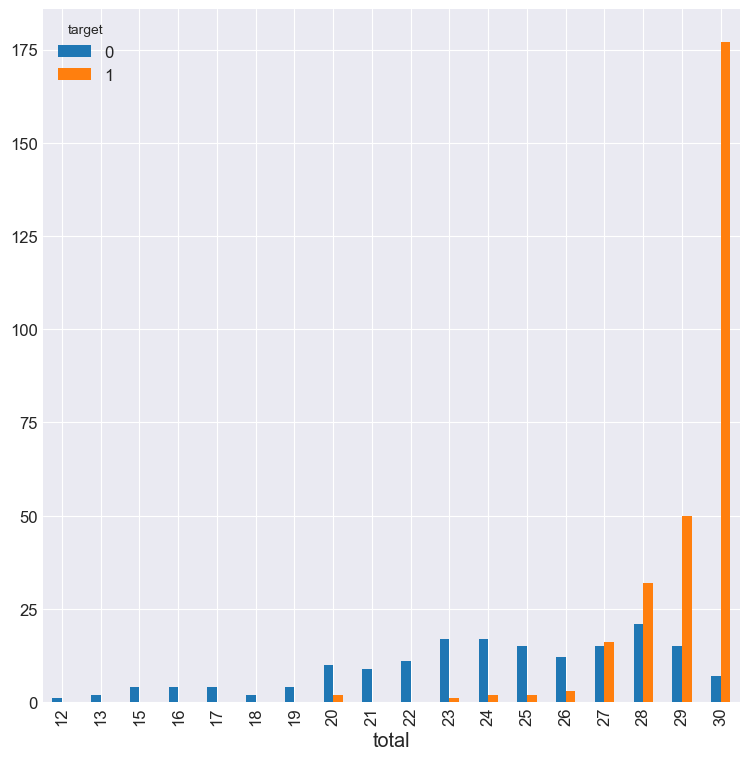

In [81]:
tmp_df = X_train.groupby(['total','target']).agg({'target':'count'})
tmp_df.columns =['count']
tmp_df.reset_index(inplace=True)
tmp_df.pivot(index='total',columns='target',values='count').plot(kind='bar')

In [82]:
from sklearn.metrics import accuracy_score
accuracy = {}

for b in range(X_train.shape[1]):
    X_train['pred'] = X_train['total'] >= b
    accuracy[b] = accuracy_score(X_train['target'],X_train['pred'])


In [83]:
b_best = max(accuracy, key=accuracy.get)
b_best

27

In [84]:
accuracy[27]

0.8505494505494505

In [85]:
X_test['total'] = X_test.astype(np.int16).sum(axis=1)

X_test['target'] = y_test

X_test.sort_values('total',inplace=True)

X_test.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,total,target
3,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,14,0
4,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,14,0
12,0,1,0,0,0,1,0,0,1,1,...,0,0,1,1,1,0,1,1,16,0
18,0,0,0,1,1,0,0,0,0,1,...,0,1,0,1,1,0,1,1,18,0
35,1,1,1,1,0,0,0,0,0,0,...,0,1,0,1,1,0,1,1,20,0


<Axes: xlabel='total'>

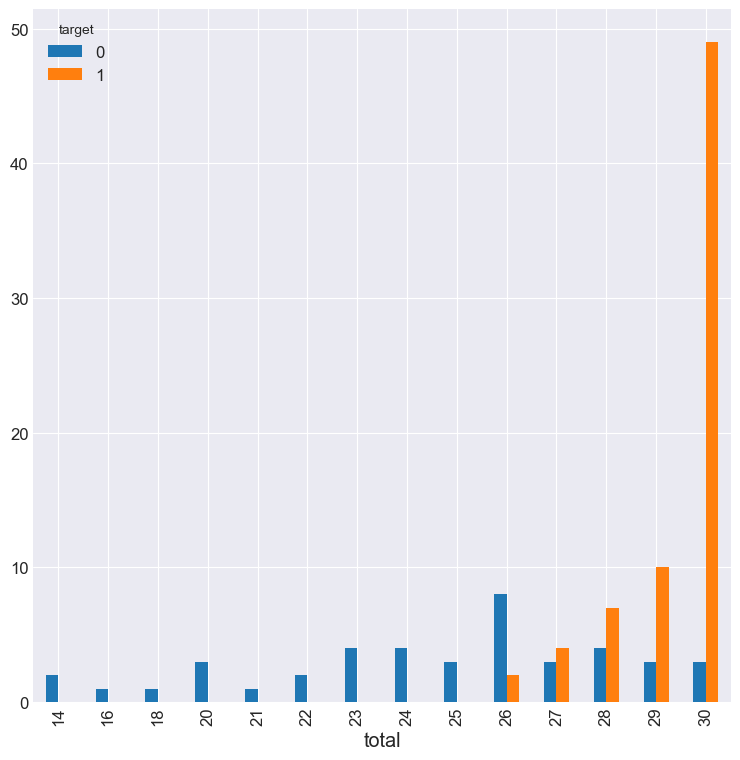

In [86]:
tmp_df = X_test.groupby(['total','target']).agg({'target':'count'})
tmp_df.columns =['count']
tmp_df.reset_index(inplace=True)
tmp_df.pivot(index='total',columns='target',values='count').plot(kind='bar')

In [102]:
acc={}
X_test['pred'] = X_test['total'] >= b_best
acc[b_best] = accuracy_score(X_test['target'],X_test['pred'])

In [104]:
acc

{27: 0.868421052631579}